# Лабораторная работа №5
## Уравнения с частными производными гиперболического типа

### Вариант 2
Гарина Ольга, Б04-901 <br>
Цель: построить аналитическое решение уравнения с частными производными гиперболического типа, исследовать заданную разностную схему на аппроксимацию и спектральную устойчивость, проверить на удваиваемых сетках

$$u'_{t} - 2u'_{x} = 0 $$ <br>
$$u(x,0) = cosx$$ <br>
$$u(1,t) = cos(1 + 2t) $$

Аналитическое решение задачи: <br>
$$u(x,t) = cos(2t + x) $$

Заданная разностная схема: <br>
$$u_{l}^{n+1} = u_{l}^{n} - \frac{\tau}{h}(u_{l+2}^{n} - 4u_{l+1}^{n} + 3u_{l}^{n}) + 2\frac{\tau^{2}}{h^{2}}(u_{l+2}^{n} - 2u_{l+1}^{n} + u_{l}^{n})$$ <br>
$$u_{l}^{0} = cosx_{l}$$ <br>
$$u_{L}^{n} = cos(1 + 2t^{n})$$ 

Вектор невязки: <br>
$$\delta f_{l}^{n} = [u'_{t}]_{l}^{n} + \frac{\tau}{2}[u''_{tt}]_{l}^{n} - 2[u'_{x}]_{l}^{n} - 2\tau [u''_{xx}]_{l}^{n} + O(h^{2}) + O(h\tau)$$

Продифференцируем начальное уравнение по очереди по x и t: <br>
$$u''_{tt} - 2u''_{xt} = 0 $$<br>
$$u''_{xt} - 2u''_{xx} = 0$$ <br>
<br>
$$u''_{tt} - 4u''_{xx} = 0$$

Подставляя полученное условие и начальное уравнение в вектор невязки получаем, что <br>
$$\delta f_{l}^{n} = O(h^{2}) + O(h\tau) $$

Теперь найдем недостающее условие $u_{L-1}^{n}$: <br>
$$[u]_{L-1}^{n} = [u]_{L}^{n} - h[u'_{x}]_{L}^{n} + O(h^{2}) $$

Используя граничные условия находим: <br>
$$[u'_{x}]_{L}^{n} = \frac{1}{2}[u'_{t}]_{L}^{n} = \frac{1}{2}(-sin(1 + 2t^{n}) \cdot 2nt^{n-1}) $$<br>
$$[u]_{L-1}^{n} = cos(1 + 2t^{n}) - h(-1/2 \cdot 2nt^{n-1}sin(1 + 2t^{n}) = cos(1 + 2t^{n}) + hnt^{n-1}sin(1 + 2t^{n}) $$

In [643]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

sns.set_theme()
plt.rcParams["figure.figsize"] = (15,10)

In [668]:
L = 21
N = 101
tau = 1/(N - 1)
h = 1/(L - 1)
x = np.linspace(0, 1, L)
t = np.linspace(0, 1, N)
t_n = 1

In [669]:
tau, h

(0.01, 0.05)

In [646]:
t, x

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99, 1.  ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [647]:
u_analytical = np.cos(x + 2) #на слое t=1

In [648]:
u_analytical

array([-0.41614684, -0.5048461 , -0.58850112, -0.66627602, -0.73739372,
       -0.80114362, -0.85688875, -0.90407214, -0.94222234, -0.97095817,
       -0.9899925 ])

Text(0, 0.5, 'u(x,1)')

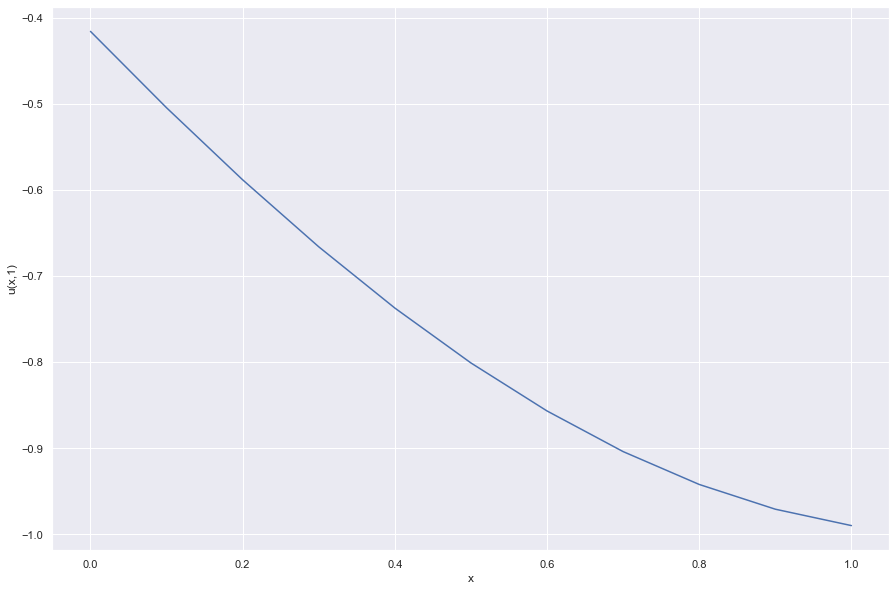

In [649]:
plt.plot(x,u_analytical)

plt.xlabel('x')
plt.ylabel('u(x,1)')

In [650]:
def a(x,t):
    return -2
def b(x,t):
    return 0
def phi(x):
    return np.cos(x)
def psi(t):
    return np.cos(1 + 2 * t)

### Исследование устойчивости спектральным признаком <br>
Для этого заменим $$u_{l}^{n} -> \lambda^{n}e^{i\alpha l}$$

$$\frac{\lambda^{n+1}e^{i\alpha l} - \lambda^{n}e^{i\alpha l}}{\tau} + \frac{1}{h}(\lambda^{n}e^{i\alpha(l + 2)} - 4\lambda^{n}e^{i\alpha(l + 1)} +3\lambda^{n}e^{i\alpha l}) - 2\frac{\tau}{h^{2}}(\lambda^{n}e^{i\alpha(l + 2)} -2\lambda^{n}e^{i\alpha(l + 1)} + \lambda^{n}e^{i\alpha l}) = 0$$


Разделим все на $\lambda^{n}e^{i\alpha l}$.

$$\lambda = 1 + 2\frac{\tau^{2}}{h^{2}}(e^{i\alpha} - 1)^{2} - \frac{\tau}{h}(e^{i\alpha} - 1)(e^{i\alpha} - 3) $$ <br>
$$|\lambda| <= 1 $$

Обозначим $\beta = \tau/h$ <br>
$$\lambda = (1-\beta)(1 - 2\beta) + 4\beta(1 - \beta)e^{i\alpha} - \beta(1 - 2\beta)e^{2i\alpha} $$<br>
$$\bar{\lambda} = (1-\beta)(1 - 2\beta) + 4\beta(1 - \beta)e^{-i\alpha} - \beta(1 - 2\beta)e^{-2i\alpha}$$

$$\lambda\bar{\lambda} = 1 - 6\beta(1 - \beta)(1 - 2\beta)^{2} + 8\beta(1 - \beta)(1 - 2\beta)^{2}cos(\alpha) - 2\beta)1 - \beta)(1 - 2\beta)^{2}cos(2\alpha) <= 1 $$

$$ -(1 - \beta)(3 - 4cos(\alpha) + 2cos(2\alpha)) <= 1$$ <br>
$$2(1 - \beta)(1 - cos(\alpha))^{2} >= 0 $$ <br>
$$\beta <= 1 $$

Таким образом, спектральное условие устойчивости выполнено при любом $\alpha$, если $\tau <= h$.

### Построение численного решения

Из получения аналитического решения имеем:<br>
На сетке: $D^{0} = {(x,t): 0\leq t \leq 1; 0\leq x \leq 1; x\leq -2t}$ <br>
$$u = cos(2t + x) $$ 


В области $D_{0} = {(x,t): 0\leq t \leq 1; 0\leq x \leq 1}$ <br>
$$ u = cos(2t + x) $$

In [651]:
u = [0 for n in range(len(t))]
for n in range(len(t)):
    u[n] = [0 for l in range(len(x))]

In [652]:
for l in range(L):
    u[0][l] = np.cos(x[l])
for n in range(N):
    u[n][L - 1] = np.cos(1 + 2 * n * tau)
for n in range(N):
    u[n][L - 2] = np.cos(1 + 2 * n * tau) + h * np.sin(1 + 2 * n * tau)

In [653]:
for n in range(N-1):
    for l in range(L-2):
        u[n+1][l] = u[n][l] - tau/h * (u[n][l+2] - 4 * u[n][l+1] + 3 * u[n][l]) + 2*tau**2/h**2 * (u[n][l+2] - 2*u[n][l+1] + u[n][l])

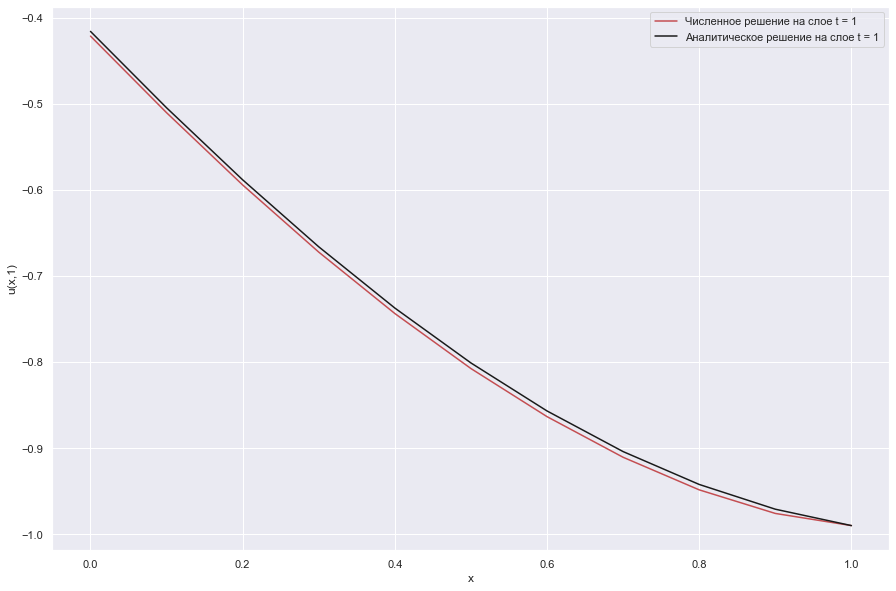

In [654]:
plt.plot(x, u[N-1], color = 'r', label = 'Численное решение на слое t = 1')
plt.plot(x,u_analytical, 'k', label = 'Аналитическое решение на слое t = 1')

plt.xlabel('x')
plt.ylabel('u(x,1)')
plt.legend()


In [655]:
delta = abs(u_analytical - u[N-1])

In [656]:
delta

array([0.00544814, 0.00571985, 0.00596091, 0.00617235, 0.00635418,
       0.00650294, 0.00660303, 0.00659648, 0.00627734, 0.00492233,
       0.        ])

In [657]:
df = pd.DataFrame(np.array([x, u_analytical, u[N-1], delta]))
df.insert(0, 'Name', ['$x_{i}$', '$u_{an}$', '$u_{comp}$', '$\Delta_{com}$'])

df.style.set_caption('Таблица 1').hide_index()

Name,0,1,2,3,4,5,6,7,8,9,10
$x_{i}$,0.000000,0.100000,0.200000,0.300000,0.400000,0.500000,0.600000,0.700000,0.800000,0.900000,1.000000
$u_{an}$,-0.416147,-0.504846,-0.588501,-0.666276,-0.737394,-0.801144,-0.856889,-0.904072,-0.942222,-0.970958,-0.989992
$u_{comp}$,-0.421595,-0.510566,-0.594462,-0.672448,-0.743748,-0.807647,-0.863492,-0.910669,-0.948500,-0.975880,-0.989992
$\Delta_{com}$,0.005448,0.005720,0.005961,0.006172,0.006354,0.006503,0.006603,0.006596,0.006277,0.004922,0.000000


In [658]:
max(delta)

0.0066030343472741615

### Вывод <br>
В ходе лабораторной работы удалось получить аналитическое решение методом, описанных в выч. практикуме. Разностная схема имеет второй порядок аппроксимации по h и первый по $\tau$. Спектральным признаком было проверено, что схема устойчива при $\tau \leq h$. Было поставлено дополнительное условие на $[u]_{L-1}^{n}$ со вторым порядком по h. При уменьшении количества членов в ряде Тейлора для постановки дополнительного условия maxdiff увеличивается. На последовательно удваиваемых сетках максимальная разница между аналитическим и численным решением уменьшается. <br>
Если условие спектральной устойчивости не выполнено, то аналитическое и численное решение сильно расходятся. Наилучшего результата удается добиться при $\tau = h$.

In [659]:
u_an = np.sin(x) + np.log(1 + (1-x)**2)

In [660]:
u_an

array([0.69314718, 0.69316026, 0.69336557, 0.69429633, 0.69690304,
       0.70256909, 0.71306248, 0.73039538, 0.7565768 , 0.79327724,
       0.84147098])

In [661]:
u_comp = [0 for n in range(len(t))]
for n in range(len(t)):
    u_comp[n] = [0 for l in range(len(x))]

In [662]:
for l in range(L):
    u_comp[0][l] = np.log(1 + x[l]**2) + np.sin(x[l])
for n in range(N):
    u_comp[n][0] = np.log(1 + (n * tau)**2)
for n in range(N):
    u_comp[n][1] = np.log(1 + (n * tau)**2) + h * (np.cos(x[0]) - 2*n*tau/(1 + (n*tau)**2))

In [663]:
for n in range(N-1):
    for l in range(2, L):
        u_comp[n+1][l] = u_comp[n][l] + tau/(2*h) * (-u_comp[n][l-2] + 4 * u_comp[n][l-1] - 3 * u_comp[n][l]) + tau**2/(2 * h**2) * (u_comp[n][l-2] - 2 * u_comp[n][l-1] + u_comp[n][l]) + tau * np.cos(x[l]) + tau**2/2 * np.sin(x[l])

In [664]:
u_comp[N-1]

[0.6931471805599453,
 0.6931471805599453,
 0.6928843101979324,
 0.6931592799579085,
 0.6950016771044893,
 0.6997733641577406,
 0.709155898608306,
 0.7250500013044339,
 0.7494048291082426,
 0.783989637511316,
 0.8301118803814319]

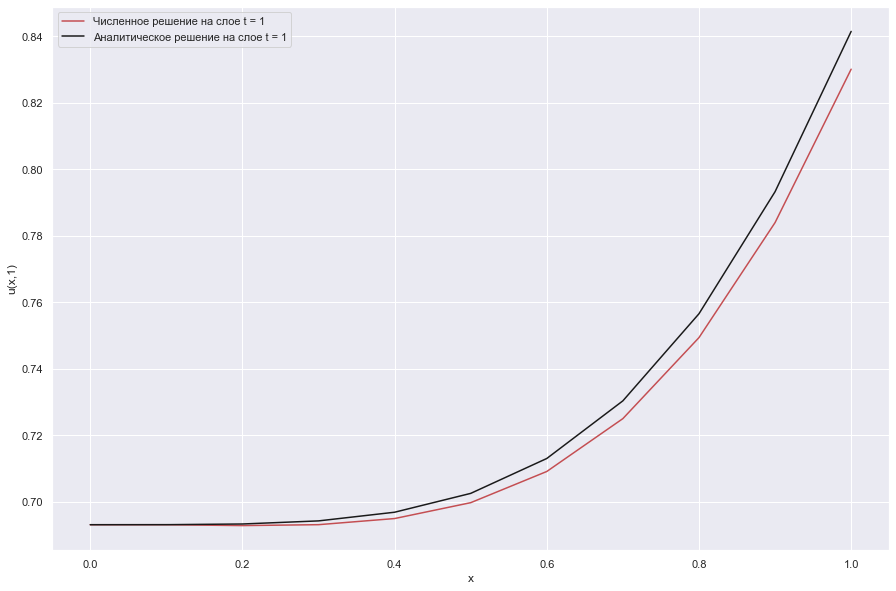

In [665]:
plt.plot(x, u_comp[N-1], color = 'r', label = 'Численное решение на слое t = 1')
plt.plot(x,u_an, 'k', label = 'Аналитическое решение на слое t = 1')

plt.xlabel('x')
plt.ylabel('u(x,1)')
plt.legend()

In [666]:
delta = abs(u_an - u_comp[N-1])

In [667]:
max(delta)

0.011359104426464595